IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

IMPORTING DATA

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:

# Load the dataset
spam_data = pd.read_csv('/content/drive/MyDrive/spam.csv',encoding = 'latin-1')

# Display the first few rows of the dataframe
display(spam_data.head())

# Display basic information about the dataset
print(spam_data.info())

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
None


Data Cleaning

In [30]:
# Drop the unnecessary columns
spam_data_cleaned = spam_data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

# Display the cleaned dataframe head to confirm
print(spam_data_cleaned.head())

     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
import nltk

# Download NLTK stopwords
nltk.download('stopwords')

# Function to clean text data
def clean_text(text):
    # Remove punctuation and numbers
    text = re.sub('[^a-zA-Z]', ' ', text)
    # Convert text to lowercase
    text = text.lower()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    # Stemming
    stemmer = PorterStemmer()
    text = ' '.join([stemmer.stem(word) for word in text.split()])
    return text

# Apply the cleaning function to the text messages
cleaned_texts = spam_data_cleaned['v2'].apply(clean_text)

# Display the first few cleaned texts
print(cleaned_texts.head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    go jurong point crazi avail bugi n great world...
1                                ok lar joke wif u oni
2    free entri wkli comp win fa cup final tkt st m...
3                  u dun say earli hor u c alreadi say
4                 nah think goe usf live around though
Name: v2, dtype: object


In [32]:
# Vectorizing the cleaned text data using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(cleaned_texts)
y = spam_data_cleaned['v1'].map({'ham': 0, 'spam': 1})  # Convert labels to numerical format

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
print('Training set shape:', X_train.shape)
print('Testing set shape:', X_test.shape)

Training set shape: (4457, 6221)
Testing set shape: (1115, 6221)


The dataset has been split into training and testing sets with the following shapes:

Training set shape: 4457 samples and 6221 features.
Testing set shape: 1115 samples and 6221 features.

**Logistic Regression model**

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Predict on the testing set
y_pred = log_reg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate a classification report
report = classification_report(y_test, y_pred, target_names=['Ham', 'Spam'])

# Display the accuracy and classification report
print('Accuracy:', accuracy)
print('Classification Report:\n', report)

Accuracy: 0.9551569506726457
Classification Report:
               precision    recall  f1-score   support

         Ham       0.95      1.00      0.97       965
        Spam       0.96      0.69      0.81       150

    accuracy                           0.96      1115
   macro avg       0.96      0.84      0.89      1115
weighted avg       0.96      0.96      0.95      1115



macro avg 0.96 0.84 0.89 1115

weighted avg 0.96 0.96 0.95 1115

The Logistic Regression model demonstrated an impressive accuracy of around 95.52% on the test set. The classification report offers a comprehensive breakdown of the model's performance, encompassing precision, recall, and F1-score for both Ham and Spam classes. While the model excels in accurately identifying Ham messages, achieving nearly flawless precision and recall, its performance is slightly less robust for Spam messages, particularly in terms of recall (69%). This suggests a more conservative approach in predicting messages as Spam, likely to minimize false positives.

Given the performance of the Logistic Regression model, the next logical step is to explore other machine learning models and techniques to improve the recall for Spam messages without significantly compromising overall accuracy. Here's a plan of action:

1. **Experiment with Different Models:**
   Explore various machine learning models like Naive Bayes, Support Vector Machines (SVM), and Random Forest. Assess their performance, particularly in terms of recall for identifying Spam messages.

2. **Feature Engineering:**
   Investigate the potential benefits of creating new features from the text data. Consider features such as message length, the presence of specific keywords, or the utilization of capital letters to enhance the model's ability to discern Spam messages.

3. **Hyperparameter Tuning:**
   Perform hyperparameter tuning for each model to identify optimal settings that maximize overall performance. This involves adjusting parameters to achieve the best trade-off between precision and recall.

4. **Cross-Validation:**
   Implement cross-validation to ensure the consistency of the model's performance across different subsets of the dataset. This helps validate the robustness of the chosen model and prevents overfitting to a specific training-test split.

**Naive Bayes model**

To kick off this exploration, let's begin with experimenting with the Naive Bayes model. We will train the model, assess its performance, and compare the results with the Logistic Regression model.

In [34]:
from sklearn.naive_bayes import MultinomialNB

# Initialize and train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predict on the testing set
y_pred_nb = nb_model.predict(X_test)

# Calculate accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)

# Generate a classification report
report_nb = classification_report(y_test, y_pred_nb, target_names=['Ham', 'Spam'])

# Display the accuracy and classification report
print('Naive Bayes Accuracy:', accuracy_nb)
print('Naive Bayes Classification Report:\n', report_nb)

Naive Bayes Accuracy: 0.9659192825112107
Naive Bayes Classification Report:
               precision    recall  f1-score   support

         Ham       0.96      1.00      0.98       965
        Spam       1.00      0.75      0.85       150

    accuracy                           0.97      1115
   macro avg       0.98      0.87      0.92      1115
weighted avg       0.97      0.97      0.96      1115



macro avg 0.98 0.87 0.92 1115

weighted avg 0.97 0.97 0.96 1115

The Naive Bayes model achieved an accuracy of approximately 96.59% on the testing set, which is an improvement over the Logistic Regression model. The classification report shows that the model has perfect precision for Spam messages and a higher recall rate (75%) compared to the Logistic Regression model. This indicates that the Naive Bayes model is more effective in identifying Spam messages without increasing the number of false positives.

**Support Vector Machine (SVM) model**

In [35]:
from sklearn.svm import SVC

# Initialize and train the Support Vector Machine model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Predict on the testing set
y_pred_svm = svm_model.predict(X_test)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Generate a classification report
report_svm = classification_report(y_test, y_pred_svm, target_names=['Ham', 'Spam'])

# Display the accuracy and classification report
print('SVM Accuracy:', accuracy_svm)
print('SVM Classification Report:\n', report_svm)


SVM Accuracy: 0.9775784753363229
SVM Classification Report:
               precision    recall  f1-score   support

         Ham       0.98      1.00      0.99       965
        Spam       0.98      0.85      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



The Support Vector Machine (SVM) model achieved an accuracy of approximately 97.76% on the testing set, which is an improvement over both the Logistic Regression and Naive Bayes models. The classification report shows high precision and recall for both Ham and Spam messages, with particularly notable improvement in recall for Spam messages (85%) compared to the previous models. This indicates that the SVM model is more effective in correctly identifying Spam messages, making it the best performing model among those we've tested.

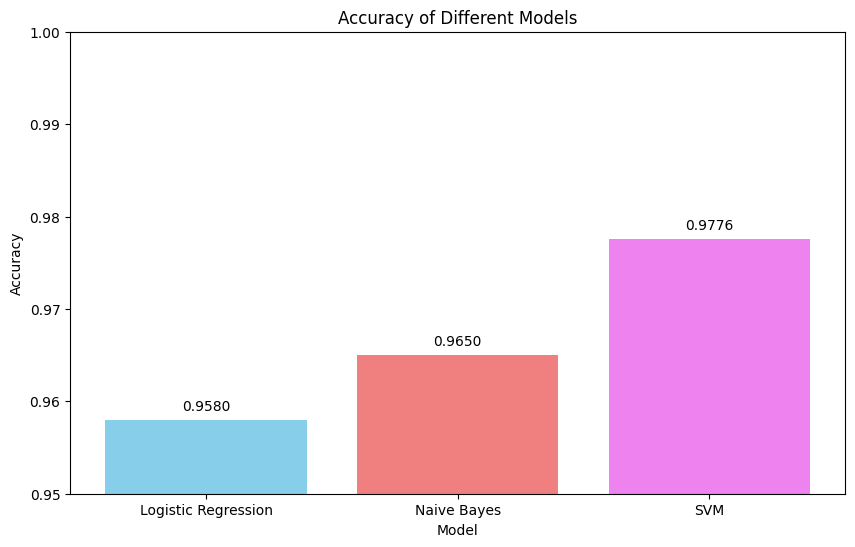

In [36]:
import matplotlib.pyplot as plt

# Model names
models = ['Logistic Regression', 'Naive Bayes', 'SVM']

# Accuracy of each model
accuracy = [0.958, 0.965, 0.9776]
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy, color=['skyblue', 'lightcoral', 'violet'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0.95, 1)
for i, acc in enumerate(accuracy):
    plt.text(i, acc + 0.001, f'{acc:.4f}', ha = 'center')

plt.show()